In [ ]:
# Install seaborn if not available (only needed once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA


In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

print("Shape of data:", X.shape)
print("Target classes:", np.unique(y))


Shape of data: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]


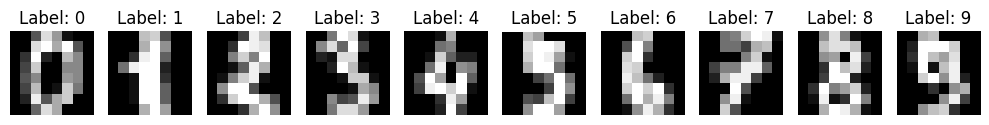

In [ ]:
# Visualize first 10 digit images
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 0.01, 0.001],
    'svm__kernel': ['rbf', 'linear']
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 0.01, 0.001],
                         'svm__kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9832970383275261


In [ ]:
y_pred = grid.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       1.00      0.91      0.96        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



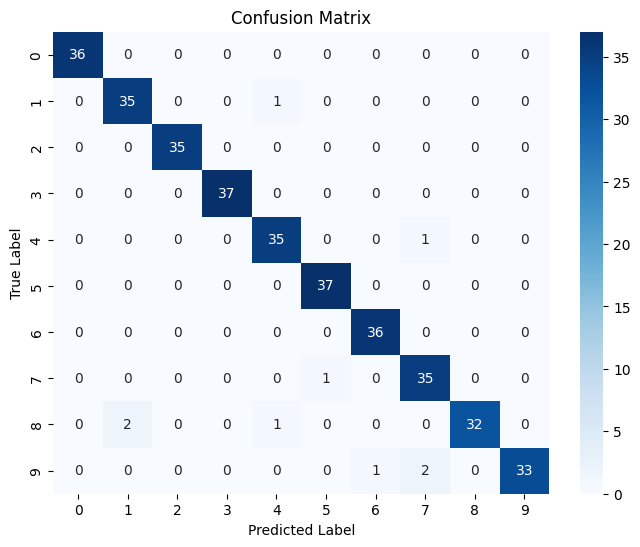

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


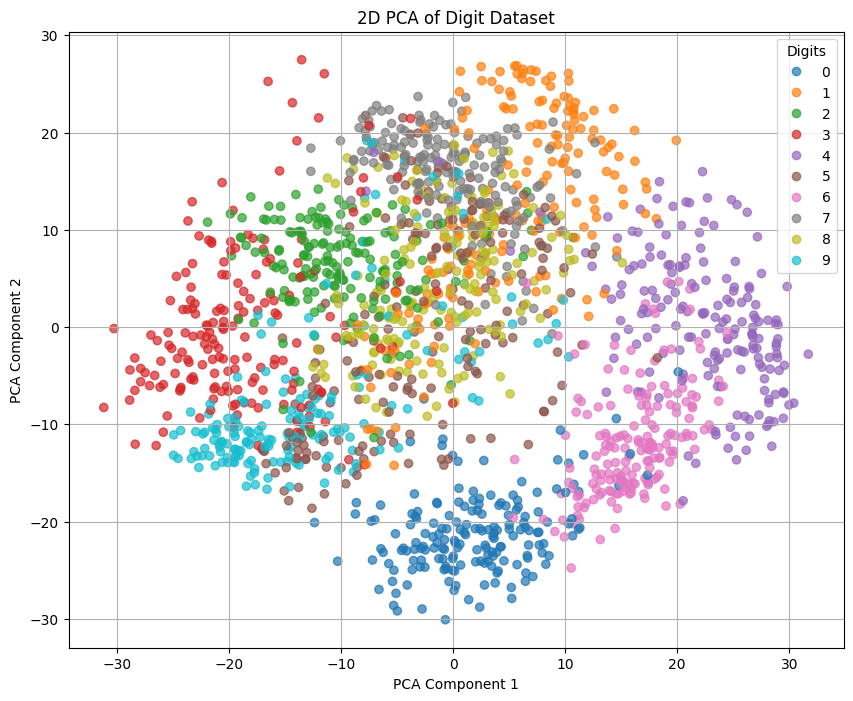

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA of Digit Dataset")
plt.grid(True)
plt.show()


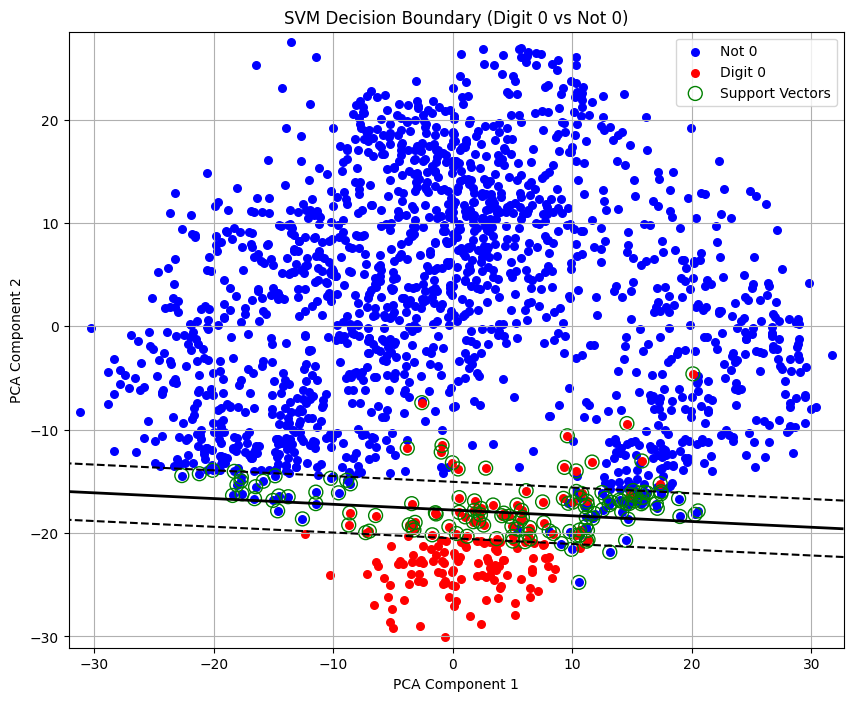

In [ ]:
# Convert to binary classification: digit '0' vs. not '0'
y_binary = (digits.target == 0).astype(int)  # 1 for '0', 0 for others

# Apply PCA to reduce to 2D
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(digits.data)

# Fit SVM with linear kernel for binary classification
svm_binary = SVC(kernel='linear', C=1)
svm_binary.fit(X_2d, y_binary)

# Create meshgrid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Compute decision function for each point in mesh
Z = svm_binary.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary, margins, and support vectors
plt.figure(figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')          # decision boundary
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles='--', colors='black')   # margins

# Plot data points
plt.scatter(X_2d[y_binary == 0][:, 0], X_2d[y_binary == 0][:, 1], c='blue', label='Not 0', s=30)
plt.scatter(X_2d[y_binary == 1][:, 0], X_2d[y_binary == 1][:, 1], c='red', label='Digit 0', s=30)

# Support vectors
plt.scatter(svm_binary.support_vectors_[:, 0], svm_binary.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='green', label='Support Vectors')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM Decision Boundary (Digit 0 vs Not 0)")
plt.legend()
plt.grid(True)
plt.show()
